# INDIAN STARTUP FUNDING ECOSYSTEM 


## Business Understanding 

1. Introduction:

The Indian startup ecosystem has witnessed phenomenal growth in recent years, attracting significant investment and emerging as a global player. This project aims to analyze the funding landscape for Indian startups from 2018 to 2021. By uncovering trends and insights, this analysis will provide valuable information for various stakeholders.

2. Business Problem:

Understanding the funding trends of Indian startups is crucial for several reasons:

Investors: Identify promising sectors and stages of investment with high growth potential.

Entrepreneurs: Gain insights into funding patterns and adjust strategies to secure funding.

Policymakers: Develop policies and initiatives that foster a supportive environment for startup growth.

General Public: Gain a broader understanding of the Indian startup landscape and its economic impact.

3. Project Hypothesis and data analytics questions:

Hypothesis 1: HealthTech and FinTech sectors attract more investment than other sectors.

Hypothesis 2: Companies founded in the last five years are more likely to be in the Seed or Pre-series stage compared to older companies.

Hypothesis 3: Startups with multiple founders tend to raise more money than those with a single founder.

Hypothesis 4: The amount of investment correlates with the stage of the company, with later-stage companies receiving higher investments.

Data Analytics Questions:
1. Total funding raised by Indian startups:
What is the total amount of funding raised by startups in the data set?

How has the total funding changed year-over-year (YoY) between the years present (assuming data includes multiple years)?

2. Funding by Stage:
How is the funding amount distributed across different funding stages (Seed, Series A, etc.)?

Are there any sectors that tend to receive more funding at a particular stage?

3. Number of Investors:
How many investors typically participate in funding rounds for companies at each stage?

Is there a correlation between the number of investors and the amount of funding received?


Company and Industry Analysis:

4. Industry Trends:
Which sectors (Tech, Health, Finance, etc.) have received the most funding?

How has funding distribution across sectors changed between years (if applicable)?

5. Startup Locations:
Where are startups headquartered geographically (City/State)?

Are there any specific locations attracting a higher concentration of startups?

6. Company Composition:
What is the average number of founders per startup?

Is there a correlation between the number of founders and the amount of funding received?

Comparative Analysis:

7. Year-over-Year Growth:
How has the number of startups and funding amount changed YoY?

Are there any particular sectors showing significant growth?


4. Data Sources:

The project will utilize data from a database and onedrive storage


5. Expected Deliverables:

This project will deliver the following:

A comprehensive report outlining the findings and insights.

Visualizations (charts, graphs) to represent key trends clearly.

Recommendations based on the analysis for various stakeholders.


### Import the necessary libraries 


In [120]:
import pyodbc 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy 
import warnings 
import re 
import scipy.stats as stats
from scipy.stats import chi2_contingency
from dotenv import dotenv_values
import datetime
from scipy.stats import pearsonr
warnings.filterwarnings('ignore')

#### Load the first dataset 
###### Create the database connection 

In [121]:
#load the environment variables from the env file into a dictionary
environment_variables=dotenv_values('.env')

# Get the values for the credentials set up in the .env file
database=environment_variables.get('database_name')
server=environment_variables.get('server_name')
username=environment_variables.get('login')
password=environment_variables.get('password')

connection_string=f"DRIVER={{SQL Server}};SERVER={"dap-projects-database.database.windows.net"};DATABASE={"dapDB"};UID={"LP1_learner"};PWD={"Hyp0th3s!$T3$t!ng"}"
connection= pyodbc.connect(connection_string)

In [122]:
# display the tables in the database 
query="SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE= 'BASE TABLE'"
data=pd.read_sql(query,connection)

data

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,LP1_startup_funding2021,BASE TABLE
1,dapDB,dbo,LP1_startup_funding2020,BASE TABLE


In [123]:
# select the 2021 table from the database and create dataframe 

query='select * from LP1_startup_funding2021'

data_2021=pd.read_sql(query, connection)

data_2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [124]:
#Add the year the data was collected to the dataframe
data_2021['year_collected']=2021
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year_collected
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021


In [125]:
# select the 2020 table from the database and create dataframe 

query='select * from LP1_startup_funding2020'

data_2020=pd.read_sql(query, connection)

data_2020

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None


In [126]:
#Add the year the data was collected to the dataframe
data_2020['year_collected']=2020
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,year_collected
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None,2020


##### Load the 2019 and 2018 datasets

In [127]:
import csv
data = open("startup_funding2018.csv","r") 
data

<_io.TextIOWrapper name='startup_funding2018.csv' mode='r' encoding='cp1252'>

In [128]:
#load the data from the csv file 
data_2018=pd.read_csv('startup_funding2018 (1).csv')

#Add the year the data was collected to the dataframe
data_2018['year_collected']=2018
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,year_collected
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018


In [129]:
data_2019=pd.read_csv('startup_funding2019.csv')
data_2019['year_collected']=2019
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,year_collected
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


## Data Cleaning 

In [130]:
# rename all columns in each dataframe to conform to the 2021 dataset

data_2018.columns=['Company_Brand','Sector','Stage', 'Amount', 'HeadQuarter', 'What_it_does','year_collected']

data_2019.columns=['Company_Brand','Founded','HeadQuarter','Sector','What_it_does','Founders','Investor', 'Amount', 'Stage', 'year_collected']

### 2018 Dataset Cleaning 


In [131]:
data_2018.head()

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does,year_collected
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018


In [132]:

data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company_Brand   526 non-null    object
 1   Sector          526 non-null    object
 2   Stage           526 non-null    object
 3   Amount          526 non-null    object
 4   HeadQuarter     526 non-null    object
 5   What_it_does    526 non-null    object
 6   year_collected  526 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 28.9+ KB


In [133]:
#check for null values 
data_2018.isna().sum()

Company_Brand     0
Sector            0
Stage             0
Amount            0
HeadQuarter       0
What_it_does      0
year_collected    0
dtype: int64

#### These values can be filled using the What_it_does column, this filling is manually done





In [134]:
sector_mappings={'Technology':r'(Mobile|E-Mobility|Technology|Internet|software|Hardware|SaaS|Blockchain|Apps|Information Services|SEM|Artificial Intelligence|AI|Clean Tech|Aerospace|Robotics|Paas|Medtech|AgriTech|HR|Tech|IoT|Networking|InfraTech|Telecommunication|Cloud|Aero|Virtual|IT|Networking|Photonics|Data|Automation|Logitech|Drone|Innovation|BioTech|BioTechnology|TaaS|Network|equipment|CRM|MarTech|Nano)',
                     'Finance':r'(Lending|Finance|Insurance|Payments|Financial Services|Credit|Mutual Funds|Banking|Escrow|Venture|Taxation|Capital|Equity|NFT|Virtual Banking|Fintech|Crypo|Crypocurrency|Insurtech)',
                     'Healthcare':r'(Health|Medical|pharmacy|pharmaceutical|diagnotics|Biopharma|Hospital|hygiene|veterinary|laboratory|bio)',
                     'Marketing':r'(Brand marketing|marketing|event promption|market)',
                     'Agriculture':r'(Farming|Agriculture|Nutrition|fishery|Hauz Khas)',
                     'Food':r'(Food|Bevarages|Dairy|Beer)',
                     'E-Commerce':r'(E-commerce|B2B|Shopping|Trading Platform|marketplace)',
                     'Consumer Services':r'(consumer|wholesale|packaging|retail|consulting|Hospitality)',
                     'Education':r'(E-learning|education|EdTech|School|Preschool)',
                     'Wellness':r'(Lifestyle|wellness|cosmetics|yoga|skincare|D2C|fitnes|training)',
                     'Real Estate':r'(Real Estate|Home Decor|Accomodation|interior design|Home|Co-living)',
                     'Logistics':r'(Travel|Transport|Transportation|Aviation|Mobility)',
                     'Automotive':r'(Automotive|Electric Vehicle|vehicles|automobile|Tyre|Car)',
                     'Manufacturing':r'(Manufacturing|FMCG|Industrial|automation)',
                     'Energy':r'(Renewable Energy|Solar|Wind|Battery|Oil and Gas|EV|Electricity)'}

# Function to categorize sector based on What_it_does
def categorize_sector(text):
    for sector, pattern in sector_mappings.items():
        if re.search(pattern, text, re.IGNORECASE):
            return sector
    return 'Other'  # Default category if no match is found

# Apply the function to categorize the Sector column
data_2018['Sector'] = data_2018['What_it_does'].apply(categorize_sector)

In [135]:

#check if the Sector column contains multiple values 
data_2018['Sector'].str.contains(',').sum()

0

In [136]:
data_2018['Sector'].unique()

array(['Energy', 'Technology', 'Marketing', 'Other', 'Finance',
       'Automotive', 'Education', 'E-Commerce', 'Healthcare',
       'Real Estate', 'Logistics', 'Food', 'Consumer Services',
       'Agriculture', 'Wellness'], dtype=object)

In [137]:
data_2018.head()

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does,year_collected
0,TheCollegeFever,Energy,Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Technology,Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Marketing,Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,Technology,Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,Other,Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018



#### Clean the amount column 

In [138]:
"""define function that will take in the values in the amount column and remove the dollar sign, 
the rupee sign and convert rupees to dollar at the average exchange rate of 2018,
and convert the amount values from string to float"""
def amt (value):
    #checks if value is null or a hyphen and return a null value 
    if (pd.isnull(value)) or (value == '—'):
        return np.nan
    #checks if the value is undisclosed and returns a null value 
    elif value=='Undisclosed':
        return np.nan
    #checks if the value starts with a dollar sign and returns a float value without the dollar sign
    elif value.startswith('$'):
        value = value[1:].replace(',','')
        return float(value)
    #checks if the value starts with a rupee sign and returns a float value without the rupee sign
    elif value.startswith('₹'):
        value=value[1:].replace(',','')
        return float(value)*0.0157
    elif isinstance(value,(int,float)):
        return value 
    else:
        return np.nan
           


In [139]:
data_2018['Amount']=data_2018['Amount'].apply(amt)

### Cleaning the Headquarters Column
here I split the text according to a delimiter and keept the first part of the text

In [140]:
#set the delimiter to ,
delimiter=','
data_2018['HeadQuarter']=data_2018['HeadQuarter'].str.partition(delimiter)[0]

data_2018['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow'],
      dtype=object)

In [141]:
#correct the wrong spellings in the HeadQuarter column  bangalore to bengaluru

data_2018['HeadQuarter']=data_2018['HeadQuarter'].str.replace('bangalore','bengaluru')

### Cleaning the Stage column


In [142]:
data_2018['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [143]:
#define stage function to replace the incorrect values in the Stage column to null vales 
def stage(value):
    if value=="Undisclosed" or value=="https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593":
        return np.nan
    else :
        return value

#apply the stage function to the stage column   
data_2018['Stage']=data_2018['Stage'].apply(stage)

#fill the null values in the stage column with the most frequent value 
data_2018['Stage'].fillna(data_2018['Stage'].mode()[0], inplace=True)


data_2018['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Series D', 'Secondary Market',
       'Post-IPO Equity', 'Non-equity Assistance', 'Funding Round'],
      dtype=object)

### 2019 Data Cleaning 

In [144]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company_Brand   89 non-null     object 
 1   Founded         60 non-null     float64
 2   HeadQuarter     70 non-null     object 
 3   Sector          84 non-null     object 
 4   What_it_does    89 non-null     object 
 5   Founders        86 non-null     object 
 6   Investor        89 non-null     object 
 7   Amount          89 non-null     object 
 8   Stage           43 non-null     object 
 9   year_collected  89 non-null     int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 7.1+ KB


In [145]:
#Check for missing values in the data frame 
data_2019.isna().sum()

Company_Brand      0
Founded           29
HeadQuarter       19
Sector             5
What_it_does       0
Founders           3
Investor           0
Amount             0
Stage             46
year_collected     0
dtype: int64

In [146]:
data_2019['Stage'].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [147]:
#fill the null values in the stage column with the most frequent value 
data_2019['Stage'].fillna(data_2019['Stage'].mode()[0], inplace=True)

### Clean the Founded, Founders column by filling in the missing values 



In [148]:
data_2019['Founded'] = data_2019['HeadQuarter'].fillna(data_2019['Founded'].mode()[0])

data_2019['Founders'] = data_2019['Founders'].fillna(data_2019['Founders'].mode()[0])

### Clean the HeadQuarter column 


In [149]:
#set the delimiter to ,
delimiter=','
data_2019['HeadQuarter']=data_2019['HeadQuarter'].str.partition(delimiter)[0]

#fill missing values with the most frequent value 
data_2019['HeadQuarter'].fillna(data_2019['HeadQuarter'].mode()[0], inplace= True)

#check the unique values in the dataset 
data_2019['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Noida',
       'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [150]:
#replace bangalore with bengaluru
data_2019['HeadQuarter']=data_2019['HeadQuarter'].str.replace('bangalore','bengaluru')

#### Clean the Sector column 


In [151]:
#using the function from the 2018 dataset we 
data_2019['Sector'] = data_2019['Sector'].astype(str)
data_2019['Sector'] = data_2019['What_it_does'].apply(categorize_sector)



#### Clean the Amount column 


In [152]:
data_2019['Amount'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [153]:
#We apply the function amt from the 218 dataset to clean the amount column
data_2019['Amount']=data_2019['Amount'].apply(amt)

In [154]:
#fill the missing values with the mode 
data_2019['Amount'].fillna(data_2019['Amount'].mode()[0])

0       6300000.0
1     150000000.0
2      28000000.0
3      30000000.0
4       6000000.0
         ...     
84     20000000.0
85    693000000.0
86      5000000.0
87     50000000.0
88     33000000.0
Name: Amount, Length: 89, dtype: float64

In [155]:
data_2019['Amount'].unique()
data_2019['Amount'].replace('nan', np.nan)

0       6300000.0
1     150000000.0
2      28000000.0
3      30000000.0
4       6000000.0
         ...     
84     20000000.0
85    693000000.0
86      5000000.0
87     50000000.0
88     33000000.0
Name: Amount, Length: 89, dtype: float64

In [156]:
data_2019['Amount']=data_2019['Amount'].fillna(data_2019['Amount'].mode()[0])

In [157]:
data_2019.isna().sum()

Company_Brand     0
Founded           0
HeadQuarter       0
Sector            0
What_it_does      0
Founders          0
Investor          0
Amount            0
Stage             0
year_collected    0
dtype: int64

### Clean the 2020 dataset

In [158]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company_Brand   1055 non-null   object 
 1   Founded         842 non-null    float64
 2   HeadQuarter     961 non-null    object 
 3   Sector          1042 non-null   object 
 4   What_it_does    1055 non-null   object 
 5   Founders        1043 non-null   object 
 6   Investor        1017 non-null   object 
 7   Amount          801 non-null    float64
 8   Stage           591 non-null    object 
 9   column10        2 non-null      object 
 10  year_collected  1055 non-null   int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 90.8+ KB


In [159]:
#view the dataset 
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,year_collected
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None,2020


In [160]:
data_2020.isna().sum()

Company_Brand        0
Founded            213
HeadQuarter         94
Sector              13
What_it_does         0
Founders            12
Investor            38
Amount             254
Stage              464
column10          1053
year_collected       0
dtype: int64

#### Clean the Founded column 
Convert to Integer to remove decimal points

Fill in missing values 

In [161]:
data_2020['Founded'].unique()

array([2019., 2018., 2020., 2016., 2008., 2015., 2017., 2014., 1998.,
       2007., 2011., 1982., 2013., 2009., 2012., 1995., 2010., 2006.,
       1978.,   nan, 1999., 1994., 2005., 1973., 2002., 2004., 2001.])

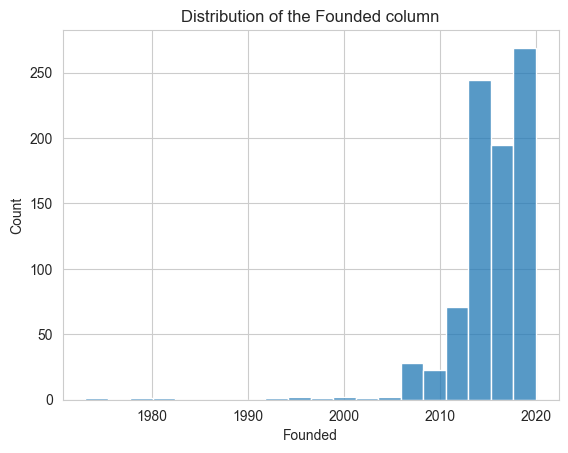

In [163]:
sns.histplot(data_2020['Founded'], bins=20)
plt.title('Distribution of the Founded column')

plt.show()

##### the founded column is not normally distributed so we use the mode to fill missing values 

In [164]:
data_2020['Founded'] = data_2020['Founded'].fillna(data_2020['Founded'].median())


In [165]:
#convert values from float to integer
data_2020['Founded']=data_2020['Founded'].astype(int)

In [166]:
#drop the column 10 column from the dataset
data_2020.drop('column10', axis =1, inplace=True )

Clean the HeadQuarter column

In [167]:
data_2020['HeadQuarter'].fillna(data_2020['HeadQuarter'].mode()[0], inplace=True)

In [168]:
data_2020['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane',
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',
      

In [169]:
#replace bangalore with bengaluru
data_2020['HeadQuarter']=data_2020['HeadQuarter'].str.replace('Bangalore','Bengaluru')
#replace banglore with bengaluru
data_2020['HeadQuarter']=data_2020['HeadQuarter'].str.replace('Banglore','Bengaluru')

In [170]:
#retain the first part of the Headquarter column separated by a delimiter 
data_2020['HeadQuarter']=data_2020['HeadQuarter'].str.partition(delimiter)[0]

#### Clean the Sector Column 


In [171]:
#using the function from the 2018 dataset we 
data_2020['Sector'] = data_2020['Sector'].astype(str)
data_2020['Sector'] = data_2020['What_it_does'].apply(categorize_sector)

#### Clean the Founders and Investor Column 

In [172]:
data_2020['Founders'] = data_2020['Founders'].fillna(data_2020['Founders'].mode()[0])

data_2020['Investor'] = data_2020['Investor'].fillna(data_2020['Investor'].mode()[0])

#### Clean the Stage Column 

In [173]:
data_2020['Stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [174]:
#fill the null values in the stage column with the most frequent value 
data_2020['Stage'].fillna(data_2020['Stage'].mode()[0], inplace=True)

#### Clean the Amount column 

In [175]:
data_2020['Amount'].unique()

array([2.0000000e+05, 1.0000000e+05,           nan, 4.0000000e+05,
       3.4000000e+05, 6.0000000e+05, 4.5000000e+07, 1.0000000e+06,
       2.0000000e+06, 1.2000000e+06, 6.6000000e+08, 1.2000000e+05,
       7.5000000e+06, 5.0000000e+06, 5.0000000e+05, 3.0000000e+06,
       1.0000000e+07, 1.4500000e+08, 1.0000000e+08, 2.1000000e+07,
       4.0000000e+06, 2.0000000e+07, 5.6000000e+05, 2.7500000e+05,
       4.5000000e+06, 1.5000000e+07, 3.9000000e+08, 7.0000000e+06,
       5.1000000e+06, 7.0000000e+08, 2.3000000e+06, 7.0000000e+05,
       1.9000000e+07, 9.0000000e+06, 4.0000000e+07, 7.5000000e+05,
       1.5000000e+06, 7.8000000e+06, 5.0000000e+07, 8.0000000e+07,
       3.0000000e+07, 1.7000000e+06, 2.5000000e+06, 4.0000000e+04,
       3.3000000e+07, 3.5000000e+07, 3.0000000e+05, 2.5000000e+07,
       3.5000000e+06, 2.0000000e+08, 6.0000000e+06, 1.3000000e+06,
       4.1000000e+06, 5.7500000e+05, 8.0000000e+05, 2.8000000e+07,
       1.8000000e+07, 3.2000000e+06, 9.0000000e+05, 2.5000000e

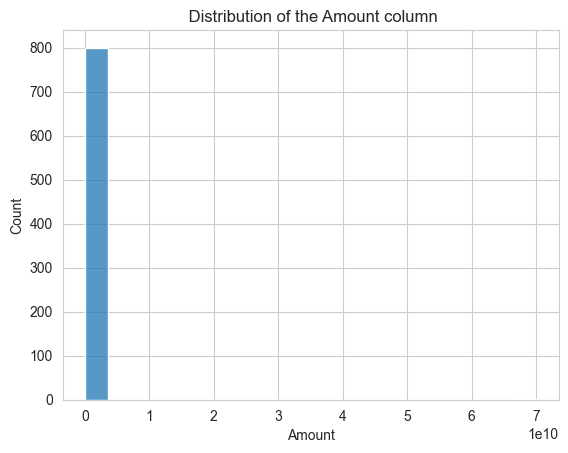

In [177]:
#plot the distribution of the amount column 
sns.histplot(data_2020['Amount'], bins=20)
plt.title(' Distribution of the Amount column')

plt.show()

In [178]:
data_2020['Amount'].fillna(data_2020['Amount'].mean(), inplace=True)

In [179]:
data_2020.isnull().sum()

Company_Brand     0
Founded           0
HeadQuarter       0
Sector            0
What_it_does      0
Founders          0
Investor          0
Amount            0
Stage             0
year_collected    0
dtype: int64

### Cleaning the 2021 dataset

In [180]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company_Brand   1209 non-null   object 
 1   Founded         1208 non-null   float64
 2   HeadQuarter     1208 non-null   object 
 3   Sector          1209 non-null   object 
 4   What_it_does    1209 non-null   object 
 5   Founders        1205 non-null   object 
 6   Investor        1147 non-null   object 
 7   Amount          1206 non-null   object 
 8   Stage           781 non-null    object 
 9   year_collected  1209 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 94.6+ KB


In [181]:
data_2021.isna().sum()

Company_Brand       0
Founded             1
HeadQuarter         1
Sector              0
What_it_does        0
Founders            4
Investor           62
Amount              3
Stage             428
year_collected      0
dtype: int64

##### Clean the Investor column 

In [182]:
has_dollar_values = data_2021['Investor'].str.startswith('$').any()
has_dollar_values

True

Some values in the Investor column belong in the Amount column this values will be moved to the Amount column 

In [183]:
mask = (~data_2021['Investor'].isna()) & data_2021['Investor'].str.contains('\$')
data_2021.loc[mask, 'Amount'] = data_2021.loc[mask, 'Investor']
data_2021.loc[mask, 'Investor'] = ''

In [184]:
#fill in the missing values with the mode 

data_2021['Investor'].fillna(data_2021['Investor'].mode()[0], inplace=True)

Clean the Stage column 

In [185]:
data_2021['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       '$1200000', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

#### Some values in the stage column should be in the amount column, I shall move them to the amount column

In [186]:
mask = (~data_2021['Stage'].isna()) & data_2021['Stage'].str.contains('\$')
data_2021.loc[mask, 'Amount'] = data_2021.loc[mask, 'Stage']
data_2021.loc[mask, 'Stage'] = ''

In [187]:
#fill the null values in the stage column with the most frequent value 
data_2021['Stage'].fillna(data_2021['Stage'].mode()[0], inplace=True)

Cleaning the Amount column 

In [188]:
#remove the dollar sign 
data_2021['Amount'] = data_2021['Amount'].str.lstrip('$')

In [189]:
data_2021['Amount'].unique()

array(['1,200,000', '120,000,000', '30,000,000', '51,000,000',
       '2,000,000', '188,000,000', '200,000', 'Undisclosed', '1,000,000',
       '3,000,000', '100,000', '700,000', '9,000,000', '40,000,000',
       '49,000,000', '400,000', '300,000', '25,000,000', '160,000,000',
       '150,000', '1,800,000', '5,000,000', '850,000', '53,000,000',
       '500,000', '1,100,000', '6,000,000', '800,000', '10,000,000',
       '21,000,000', '7,500,000', '26,000,000', '7,400,000', '1,500,000',
       '600,000', '800,000,000', '17,000,000', '3,500,000', '15,000,000',
       '215,000,000', '2,500,000', '350,000,000', '5,500,000',
       '83,000,000', '110,000,000', '500,000,000', '65,000,000',
       '150,000,000,000', '300,000,000', '2,200,000', '35,000,000',
       '140,000,000', '4,000,000', '13,000,000', None, '2000000',
       '800000', '6000000', '2500000', '9500000', '13000000', '5000000',
       '8000000', '1000000', '1200000', '200000', '12000000', '1500000',
       '1700000', '5500000',

In [190]:
def check_and_replace_alphabetic(value):
  """
  Checks if a string starts with a letter and replaces with NaN.
  Returns:
      float or np.NAN: The value as float if not alphabetic, otherwise NaN.
  """
  if pd.api.types.is_string_dtype(value) and value.isalpha():
    return np.NAN
  else:
    try:
      return float(value)  # Convert to float if possible (handles numeric strings)
    except (ValueError, TypeError):
      return value  # Return the original value if conversion fails (e.g., non-numeric strings)


data_2021['Amount']=data_2021['Amount'].apply(check_and_replace_alphabetic)


In [191]:
data_2021['Amount'] = pd.to_numeric(data_2021['Amount'].str.replace('[^\d\-+\.]', '', regex=True), errors='coerce')

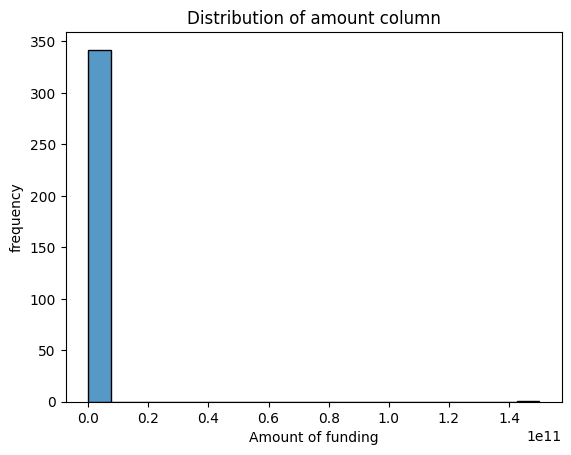

In [ ]:
sns.histplot(data_2021['Amount'], bins=20)
plt.title('Distribution of amount column')
plt.ylabel('frequency')
plt.xlabel('Amount of funding')
plt.show()

In [192]:
#fill the null values with mode 

data_2021['Amount'].fillna(data_2021['Amount'].mode()[0], inplace=True)

data_2021['Amount'].isna().sum()

0

#### Cleaning the Sector column

In [193]:
#using the function from the 2018 dataset we 
data_2021['Sector'] = data_2021['Sector'].astype(str)
data_2021['Sector'] = data_2021['What_it_does'].apply(categorize_sector)

In [194]:
data_2021['Sector'].unique()

array(['Technology', 'Education', 'Marketing', 'Real Estate',
       'Healthcare', 'Automotive', 'Energy', 'Other', 'Finance', 'Food',
       'Consumer Services', 'Wellness', 'E-Commerce', 'Manufacturing',
       'Logistics'], dtype=object)

#### Cleaning the Founders  and Founded Columns

In [195]:
#fill in the missing values 

data_2021['Founders'].fillna(data_2021['Founders'].mode()[0], inplace=True)
data_2021['Founded'].fillna(data_2021['Founded'].mode()[0], inplace=True)


#### Cleaning the headQuarter column 

In [196]:
#retain the first part of the Headquarter column separated by a delimiter 
data_2021['HeadQuarter']=data_2021['HeadQuarter'].str.partition(delimiter)[0]

In [197]:
data_2021['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None, 'Small Towns', 'Goa',
       'Rajsamand', 'Ranchi', 'Faridabad', 'Gujarat', 'Pune', 'Thane',
       'Computer Games', 'Cochin', 'Noida', 'Chandigarh', 'Gurgaon',
       'Vadodara', 'Food & Beverages', 'Pharmaceuticals\t#REF!',
       'Gurugram\t#REF!', 'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana',
       'Indore', 'Powai', 'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna',
       'Samsitpur', 'Lucknow', 'Telangana', 'Silvassa',
       'Thiruvananthapuram', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View', 'Trivandrum', 'Jharkhand',
       'Kanpur', 'Bhilwara', 'Guwahati', 'Online Media\t#REF!', 'Kochi',
       'London', 'Information Technology & Services', 'The Nilgiris',
       'Gandhinagar'], 

In [198]:
#define a dictionary to hold the values to be replaced and their replacements 
replacements={'Bangalore':'Bengaluru','Computer Games':'','Pharmaceuticals\t#REF!':'','Gurugram\t#REF!':'Gurugram','Online Media\t#REF!':'','Information Technology & Services':''}

#replace the incorrect values in the stage column with the correct values 
for incorrect_value, correct_value in replacements.items():
    data_2021['HeadQuarter'] = data_2021['HeadQuarter'].str.replace(incorrect_value, correct_value, regex=False)


#fill the null values in the stage column with the most frequent value 
data_2021['HeadQuarter'].fillna(data_2021['HeadQuarter'].mode()[0], inplace=True)

In [199]:
data_2021.isna().sum()

Company_Brand     0
Founded           0
HeadQuarter       0
Sector            0
What_it_does      0
Founders          0
Investor          0
Amount            0
Stage             0
year_collected    0
dtype: int64

#### Concatenating the Dataframes 

In [200]:
clean_data=pd.concat([data_2021, data_2020,data_2019,data_2018],axis=0)

clean_data.isna().sum()

Company_Brand       0
Founded           526
HeadQuarter         0
Sector              0
What_it_does        0
Founders          526
Investor          526
Amount            323
Stage               0
year_collected      0
dtype: int64

##### Fill in the missing values 

In [201]:
clean_data['Founders'].fillna(clean_data['Founders'].mode()[0], inplace=True)
clean_data['Investor'].fillna(clean_data['Investor'].mode()[0], inplace=True)
clean_data['Founded'].fillna(clean_data['Founded'].mode()[0], inplace=True)
clean_data['Amount'].fillna(clean_data['Amount'].median(), inplace=True)

In [202]:
clean_data.isna().sum()

Company_Brand     0
Founded           0
HeadQuarter       0
Sector            0
What_it_does      0
Founders          0
Investor          0
Amount            0
Stage             0
year_collected    0
dtype: int64

#### For proper analysis we need to find the number of investors and the number of founders 

In [203]:
def count_comma_separated_strings(df, column_name):
  """
  This function counts the number of comma-separated strings in a column and returns a new column with the counts.
  """

  # Apply a lambda function for vectorized operation
  df['num_strings'] = df[column_name].apply(lambda x: len(str(x).split(',')))

  return df

#Apply the function
clean_data= count_comma_separated_strings(clean_data, 'Investor')  


In [204]:
#rename the column to no_of_investors and drop the investor column 
clean_data=clean_data.rename(columns={'num_strings':'no_of_investors'})
clean_data.drop(columns='Investor', inplace = True)

In [205]:
#Apply a function to create a column named num_strings with the number of founders 
clean_data= count_comma_separated_strings(clean_data, 'Founders') 
#rename the column to no_of_investors and drop the investor column 
clean_data=clean_data.rename(columns={'num_strings':'no_of_founders'})
clean_data.drop(columns='Founders', inplace = True)

In [206]:
clean_data

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Amount,Stage,year_collected,no_of_investors,no_of_founders
0,Unbox Robotics,2019.0,Bengaluru,Technology,Unbox Robotics builds on-demand AI-driven ware...,1200000.0,Pre-series A,2021,2,2
1,upGrad,2015.0,Mumbai,Education,UpGrad is an online higher education platform.,120000000.0,Seed,2021,2,4
2,Lead School,2012.0,Mumbai,Technology,LEAD School offers technology based school tra...,30000000.0,Series D,2021,2,2
3,Bizongo,2015.0,Mumbai,Marketing,Bizongo is a business-to-business online marke...,51000000.0,Series C,2021,2,3
4,FypMoney,2021.0,Gurugram,Technology,"FypMoney is Digital NEO Bank for Teenagers, em...",2000000.0,Seed,2021,3,1
...,...,...,...,...,...,...,...,...,...,...
521,Udaan,2016.0,Bangalore,E-Commerce,"Udaan is a B2B trade platform, designed specif...",1000000.0,Series C,2018,1,1
522,Happyeasygo Group,2016.0,Haryana,Technology,HappyEasyGo is an online travel domain.,1000000.0,Series A,2018,1,1
523,Mombay,2016.0,Mumbai,Technology,Mombay is a unique opportunity for housewives ...,1000000.0,Seed,2018,1,1
524,Droni Tech,2016.0,Mumbai,Technology,Droni Tech manufacture UAVs and develop softwa...,549500.0,Seed,2018,1,1


In [207]:
clean_data['Sector'].unique()

array(['Technology', 'Education', 'Marketing', 'Real Estate',
       'Healthcare', 'Automotive', 'Energy', 'Other', 'Finance', 'Food',
       'Consumer Services', 'Wellness', 'E-Commerce', 'Manufacturing',
       'Logistics', 'Agriculture'], dtype=object)

In [208]:
clean_data['Founded'].unique()

array([2019.0, 2015.0, 2012.0, 2021.0, 2014.0, 2018.0, 2016.0, 2020.0,
       2010.0, 2017.0, 1993.0, 2008.0, 2013.0, 1999.0, 1989.0, 2011.0,
       2009.0, 2002.0, 1994.0, 2006.0, 2000.0, 2007.0, 1978.0, 2003.0,
       1998.0, 1991.0, 1984.0, 2004.0, 2005.0, 1963.0, 1982, 1995, 1973,
       2001, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

####

In [209]:
def clean(value):
    if isinstance(value, str):
        return np.nan
    else:
        return value

clean_data['Founded']=clean_data['Founded'].apply(clean)

clean_data['Founded'].fillna(clean_data['Founded'].mode()[0],inplace=True)

In [210]:
clean_data['Stage'].unique()

array(['Pre-series A', 'Seed', 'Series D', 'Series C', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt', '',
       'Bridge', 'Seed+', 'Series F2', 'Series A+', 'Series G',
       'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Early seed', 'Series D1', 'Seies A',
       'Pre-series', 'Series A2', 'Series I', 'Pre-series C', 'Series B2',
       'Pre- series A', 'Edge', 'Pre-Series B', 'Seed A', 'Series A-1',
       'Seed Funding', 'Pre-Seed', 'Seed round', 'Pre-seed Round',
       'Seed Round & Series A', 'Pre Series A', 'Pre seed Round',
       'Angel Round', 'Pre series A1', 'Series E2', 'Pre series A',
       'Seed Round', 'Bridge Round', 'Pre seed round', 'Pre series B',
       'Pre series C', 'Seed Investment', 'Mid series', 'Series C, D',
       'Seed funding', 'Fresh funding', 'Post series A', 'Seed fund',
       'Series B+', 'Angel', 'Private Equity', 'Venture - Series Unknown',
       'Grant', 'Debt Financing', 'Pos

In [213]:
#define a dictionary to hold the values to be replaced and their replacements 
replacements={'Pre-series A1':'Pre seed','Pre-series A':'Pre seed','Pre-seed':'Pre seed','Pre-series B':'Pre seed','Seed+':'Seed','Series F2':'Series F',
                'Series A+':'Series A','Series B3':'Series B','PE':'Pre seed','Series F1':'Series F','Pre series A1':'Pre seed', 'Early seed':'Seed',
                'Series D1':'Series D','Seies A':'Series A','Pre-series':'Pre seed','Series A2':'Series A','Venture - Series Unknown':'Venture','Series B+':'Series B',
                'Seed fund':'Seed','Post series A':'Series A','Seed funding':'Seed','Series C, D':'Series C','Seed Investment':'Seed','Pre series C':'Pre seed',
                'Pre series B': 'Pre seed','Pre seed round':'Pre seed','Seed Round':'Seed','Pre series A':'Pre seed','Series E2':'Series E','Pre seed Round':'Pre seed',
                'Pre Series A':'Pre seed','Seed Round & Series A':'Seed','Pre-seed Round':'Pre seed','Seed round':'Seed','Seed Funding':'Seed','Series A-1':'Series A',
                'Seed A':'Seed','Pre- series A':'Pre seed','Series B2':'Series B','Pre-series C':'Pre seed','Pre-Series B':'Pre seed','Pre seed C':'Pre seed','Pre-Seed':'Pre seed',
                'Seed & Series A':'Seed','Seeding':'Seed'}

#replace the incorrect values in the stage column with the correct values 
for incorrect_value, correct_value in replacements.items():
    clean_data['Stage'] = clean_data['Stage'].str.replace(incorrect_value, correct_value, regex=False)

In [214]:
clean_data['Stage'].unique()

array(['Pre seed', 'Seed', 'Series D', 'Series C', 'Series B', 'Series E',
       'Series A', 'Debt', '', 'Bridge', 'Series F', 'Series G',
       'Series H', 'Series I', 'Edge', 'Angel Round', 'Bridge Round',
       'Mid series', 'Fresh funding', 'Angel', 'Private Equity',
       'Venture', 'Grant', 'Debt Financing', 'Post-IPO Debt',
       'Corporate Round', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [261]:
clean_data.to_csv('clean_data.csv')

### Exploratory Data Analysis 

The exploratory data analysis follows the following format:

1. Basic statistics like central tendancy Distribution and frequency 

2. Trends and relationships:
Funding vs Year

Stage vs Sector 

Year vs Location 



##### Central Tendancy 


In [215]:
clean_data.describe()

,Founded,Amount,year_collected,no_of_investors,no_of_founders
count,2879.000000,2.879000e+03,2879.000000,2879.000000,2879.000000
mean,2016.083710,1.001079e+08,2020.023619,1.558875,1.761028
std,3.710737,3.085412e+09,1.086974,0.869483,0.933060
min,1963.000000,9.420000e+02,2018.000000,1.000000,1.000000
25%,2015.000000,1.000000e+06,2020.000000,1.000000,1.000000
50%,2016.000000,1.000000e+06,2020.000000,1.000000,2.000000
75%,2018.000000,7.500000e+06,2021.000000,2.000000,2.000000
max,2021.000000,1.500000e+11,2021.000000,8.000000,8.000000


Founding Year: On average, startups were founded in 2016 (mean), with the earliest in 1963 (min) and the most recent in 2021 (max). There's a spread of 3.7 years (std) in founding years.

Funding Amount: The average funding amount is a staggering 100.1 billion (mean), but with a vast range. The minimum funding is 942 (min), while the maximum is a whopping 1.5 trillion (max), indicating a few outliers with exceptionally high funding rounds.

Year Funding Received: The average year a startup received funding is 2020 (mean), with a standard deviation of 1.1 years (std).

Investors and Founders: The average startup has 1.56 investors (mean) and 1.76 founders (mean), with some variation across startups (std)


### Distribution 

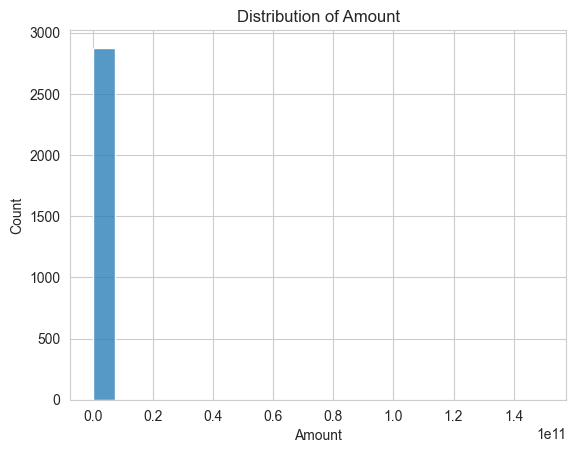

In [217]:
# Distribution of the Amount Column 
sns.histplot(clean_data['Amount'], bins=20)
plt.title('Distribution of Amount')

plt.show()

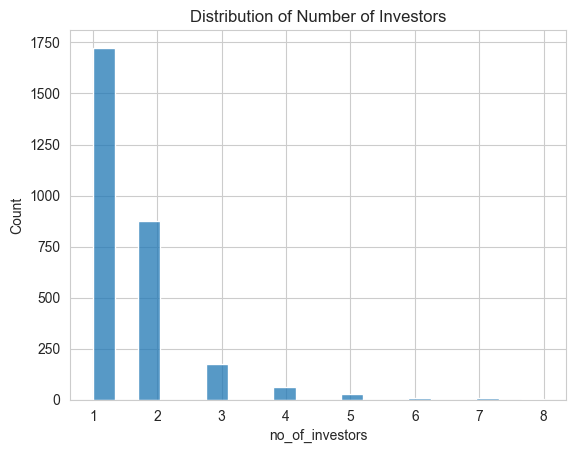

In [218]:
#Distribution of the number of investors 
sns.histplot(clean_data['no_of_investors'], bins=20)
plt.title('Distribution of Number of Investors')

plt.show()

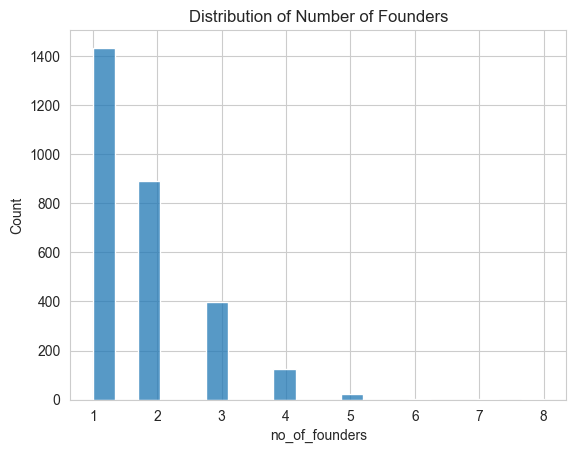

In [219]:
#Distribution of the number of founders 
sns.histplot(clean_data['no_of_founders'], bins=20)
plt.title('Distribution of Number of Founders')

plt.show()

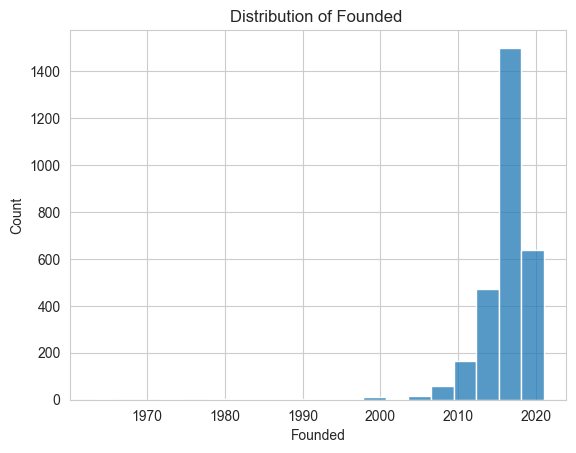

In [220]:
# Distribution of the Founded Column 
sns.histplot(clean_data['Founded'], bins=20)
plt.title('Distribution of Founded ')

plt.show()

##### Relationships 

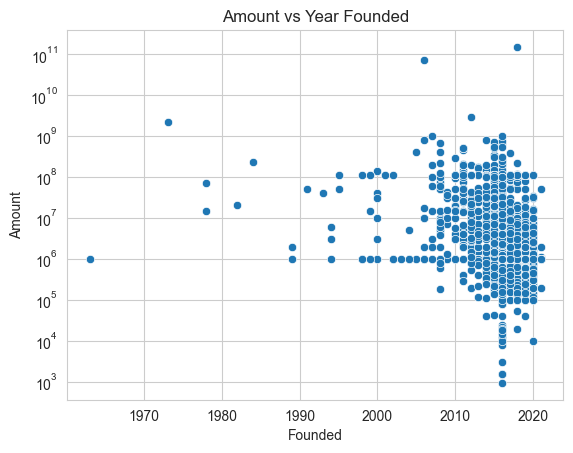

In [221]:
#Relationship between Funding and founded year 
sns.scatterplot(y='Amount',x='Founded', data=clean_data)
plt.yscale('log')
plt.title('Amount vs Year Founded')

plt.show()

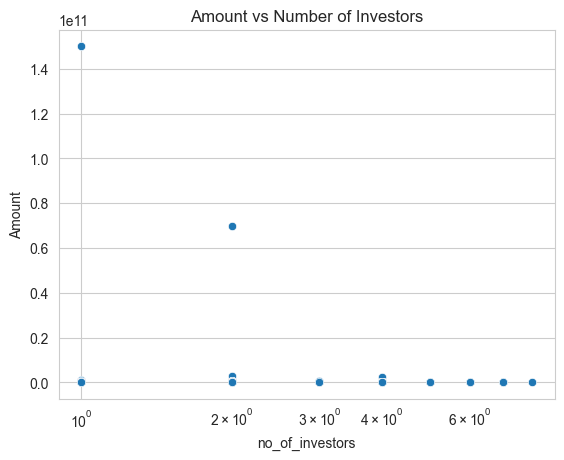

In [223]:
#Relationship between Funding and Investors 
sns.scatterplot(y='Amount',x='no_of_investors', data=clean_data)
plt.xscale('log')
plt.title('Amount vs Number of Investors')

plt.show()

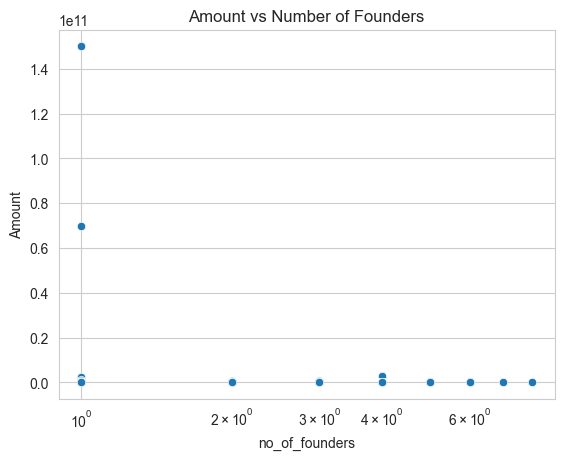

In [224]:
#Relationship between Funding and founders  
sns.scatterplot(y='Amount',x='no_of_founders', data=clean_data)
plt.xscale('log')
plt.title('Amount vs Number of Founders')

plt.show()

#### Frequency and counts 

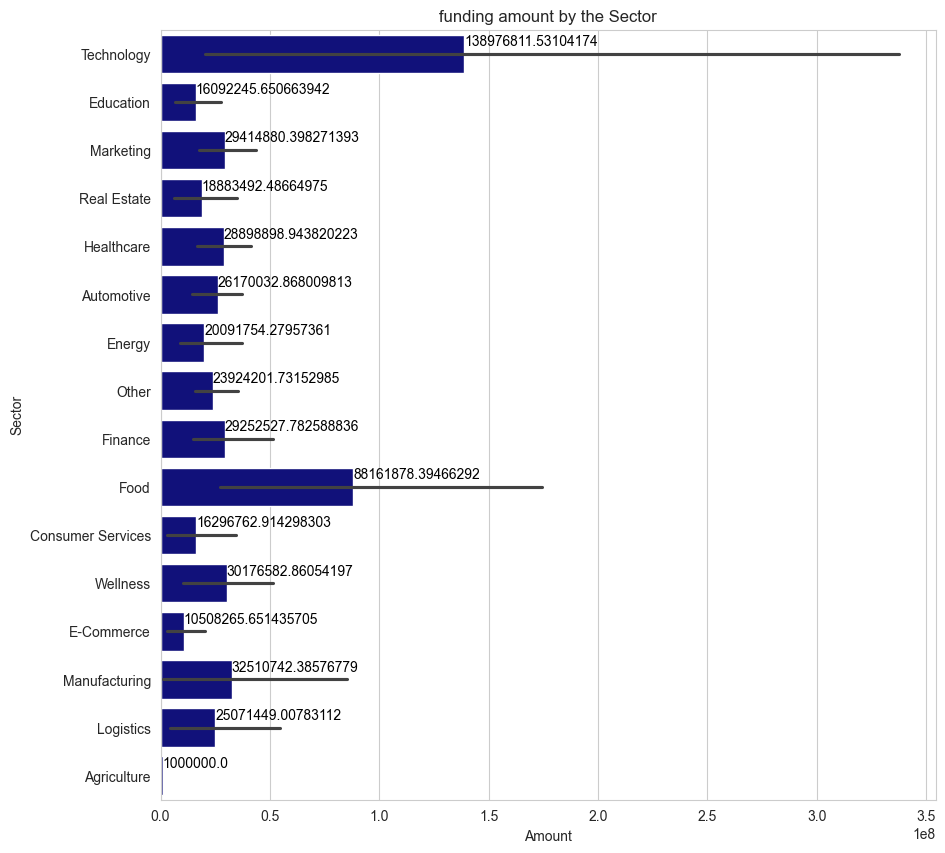

In [226]:
#relationship between sector and amount 
sector_amount=clean_data.groupby('Sector')['Amount'].sum().reset_index()

sns.set_style('whitegrid')
plt.figure(figsize=(10,10))

ax=sns.barplot(x='Amount',y='Sector', data=clean_data,color='darkblue',orient='h')
plt.title('funding amount by the Sector')


for p in ax.patches:
    ax.annotate(p.get_width(),  (p.get_x() + p.get_width(), p.get_y() ), color="black", fontsize=10, ha='left', va='top')
plt.show()

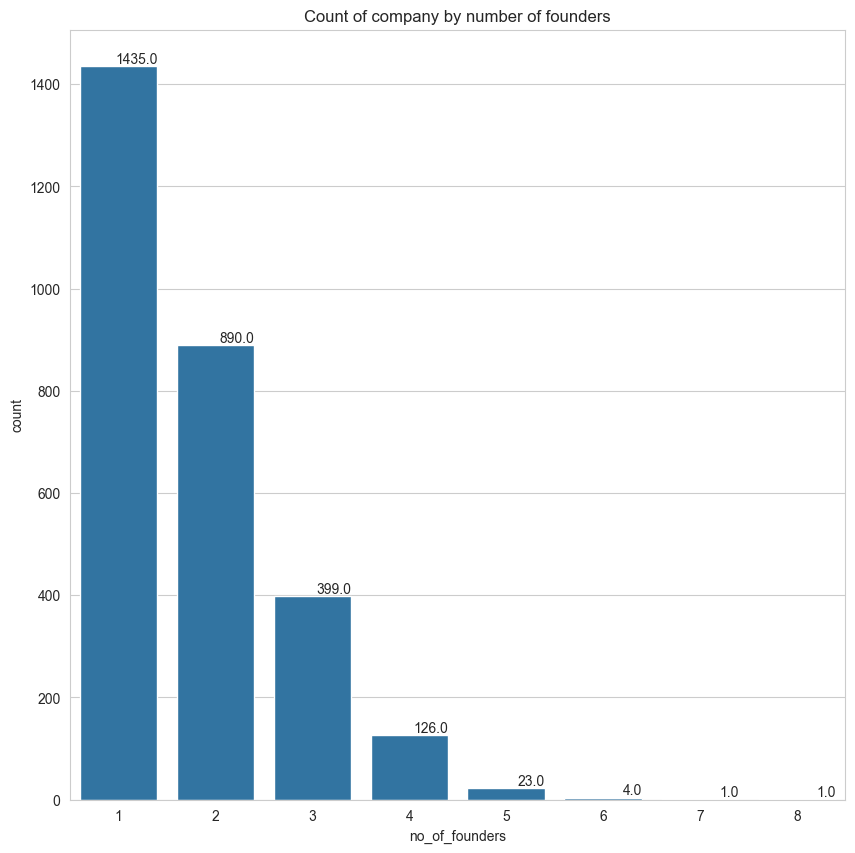

In [227]:
#count of companies by founder count 
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))

#create count plot 
ax=sns.countplot(x='no_of_founders',data=clean_data)
plt.title('Count of company by number of founders')


#annotate the plot 
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width(), p.get_height()), va='bottom', ha='right')
plt.show()

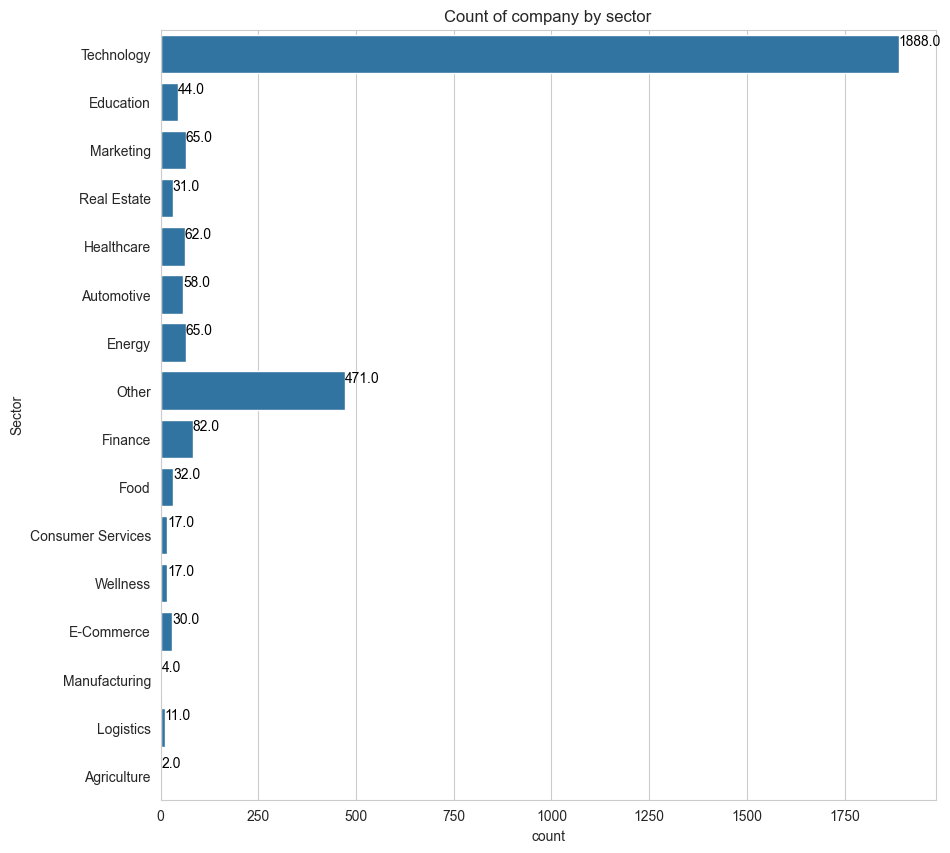

In [228]:
# count of company by sector 
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))

#create count plot 
ax=sns.countplot(clean_data['Sector'])
plt.title('Count of company by sector')


#annotate each bar with the counts of company by sector
for p in ax.patches:
    ax.annotate(p.get_width(),  (p.get_x() + p.get_width(), p.get_y()), color="black", fontsize=10, ha='left', va='top')

### Hypothesis testing 

Hypothesis 1: Healthcare and Technology sectors attract more investment than other sectors.

Null Hypothesis (H0): The average investment in Healthcare and technology sectors is equal to the average investment in other sectors.

Alternative Hypothesis (H1): The average investment in Healthcare and technology sectors is different from the average investment in other sectors (not necessarily higher).

In [229]:
# Group data by sector and calculate total investment
sector_investment = clean_data.groupby("Sector")["Amount"].sum()

# Combine HealthTech and FinTech data
healthcare_technology_investment = sector_investment[["Healthcare", "Technology"]]

# Calculate average investment in all other sectors
other_sectors_investment = sector_investment.drop(["Healthcare", "Technology"])


In [230]:

# Perform a two-tailed t-test
tstat, pval = stats.ttest_ind(healthcare_technology_investment, other_sectors_investment)

print("Tstat:", tstat,  "\npval:", pval)

Tstat: 3.4964408922116506 
pval: 0.0035603020854689917


In [231]:
#we set a significance level of alpha=0.05 and intepret the results of the t-test
alpha=0.05
if pval<alpha:
    print("Reject null hypothesis \n The average investment in Healthcare and technology sectors is equal to the average investment in other sectors")
else:
    print("Fail to reject null hypothesis\n No Significant evidence found ")

Reject null hypothesis 
 The average investment in Healthcare and technology sectors is equal to the average investment in other sectors


Hypothesis 2: Companies founded in the last five years are more likely to be in the Seed or Pre-series stage compared to older companies.

Null Hypothesis (H0): There's no association between the founding year (recent vs. older) and the funding stage.

Alternative Hypothesis (H1): There's an association between the founding year and the funding stage (companies founded recently are more likely to be in Seed or Pre-series).

In [232]:
# Calculate a new variable for recent founding
clean_data["Recent Founding"] = datetime.date.today().year - clean_data["Founded"] <= 5



In [233]:
# Create a contingency table for Recent Founding vs. Funding Stage
contingency_table = pd.crosstab(clean_data["Recent Founding"], clean_data["Stage"])

# Perform chi-square test
chi2, pval, _, _ = chi2_contingency(contingency_table.values)

In [234]:
# Set significance level
alpha = 0.05

# Print test results
print("Chi-square statistic:", chi2)
print("p-value:", pval)

if pval < alpha:
  print("Reject null hypothesis. There's an association between recent founding and funding stage.")
else:
  print("Fail to reject null hypothesis. Not enough evidence to conclude an association.")

Chi-square statistic: 251.93057716667042
p-value: 2.15113530038463e-37
Reject null hypothesis. There's an association between recent founding and funding stage.


Startups with multiple founders tend to raise more money than those with a single founder. 

Since the funding amount is normally distributed we shall use a two-tailed t-test

In [235]:
#Create a new dataframe with only the relevant columns
df=clean_data[['no_of_founders','Amount']]

#separate the data into single founders and multiple founders
single_founders=df[df['no_of_founders']==1]['Amount']
multiple_founders=df[df['no_of_founders']> 1]['Amount']

#conduct the two-tailed t-test to compare the two means of the multiple and single founders
tstat, pval=stats.ttest_ind(single_founders, multiple_founders)

#we set a significance level of alpha=0.05 and intepret the results of the t-test
alpha=0.05
if pval<alpha:
    print("Reject null hypothesis \n Startups with multiple founders tend to attract more funding")
else:
    print("Fail to reject null hypothesis\n No Significant evidence found ")

Fail to reject null hypothesis
 No Significant evidence found 


Hypothesis 4: The amount of investment correlates with the stage of the company, with later-stage companies receiving higher investments.



In [236]:
# Encode funding stage as numerical (consider label encoding or other techniques)
clean_data["Funding Stage Encoded"] = pd.Categorical(clean_data["Stage"]).codes

# Calculate Pearson's correlation coefficient
correlation, pval = pearsonr(clean_data["Amount"], clean_data["Funding Stage Encoded"])

In [237]:
# Print correlation results
print("Correlation coefficient:", correlation)
print("p-value:", pval)

if abs(correlation) > 0.5 and pval < 0.05:  # Adjust thresholds as needed
  if correlation > 0:
    print("Strong positive correlation. Investment increases with later funding stages (supports H4).")
  else:
    print("Strong negative correlation. Investment decreases with later funding stages (doesn't support H4).")
elif pval < 0.05:
  print("Weak but statistically significant correlation. Investment might be related to funding stage.")
else:
  print("No statistically significant correlation between investment amount and funding stage.")

Correlation coefficient: -0.05216400352915913
p-value: 0.00511629976701086
Weak but statistically significant correlation. Investment might be related to funding stage.


## Data Analytics Questions 

1. Total funding raised by Indian startups:
What is the total amount of funding raised by startups in the data set?
How has the total funding changed year-over-year (YoY) between the years present (assuming data includes multiple years)?

In [238]:
Total_funding=clean_data['Amount'].sum()
Total_funding

288210502299.9401

<Axes: title={'center': 'Funding per year'}, xlabel='year', ylabel='Amount of Funding'>

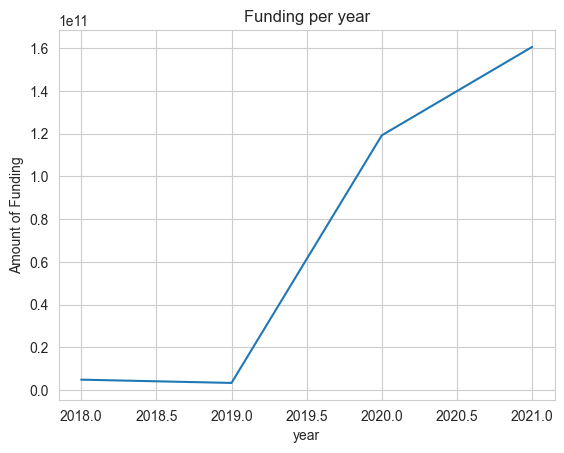

In [239]:
clean_data.groupby('year_collected')['Amount'].sum().plot(kind='line', title='Funding per year', ylabel= 'Amount of Funding', xlabel='year')





2. Funding by Stage:
How is the funding amount distributed across different funding stages (Seed, Series A, etc.)?

Are there any sectors that tend to receive more funding at a particular stage?

Text(0.5, 1.0, 'Funding by Stage')

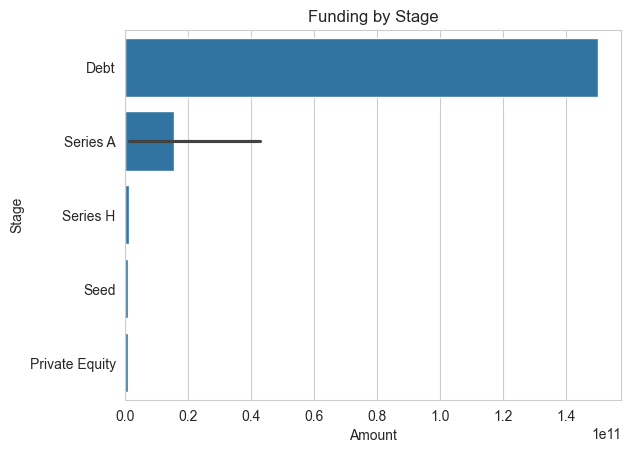

In [240]:

top_10_data = clean_data[['Stage','Amount']].sort_values(by='Amount', ascending=False).head(10)
ax=sns.barplot(y='Stage',x='Amount', data= top_10_data)
plt.title('Funding by Stage')

#annotate the plot 


3. Number of Investors:
How many investors typically participate in funding rounds for companies at each stage?

Is there a correlation between the number of investors and the amount of funding received?


<Axes: title={'center': 'Number of Investors vs Stage'}, xlabel='Stage of company', ylabel='Number of Investors'>

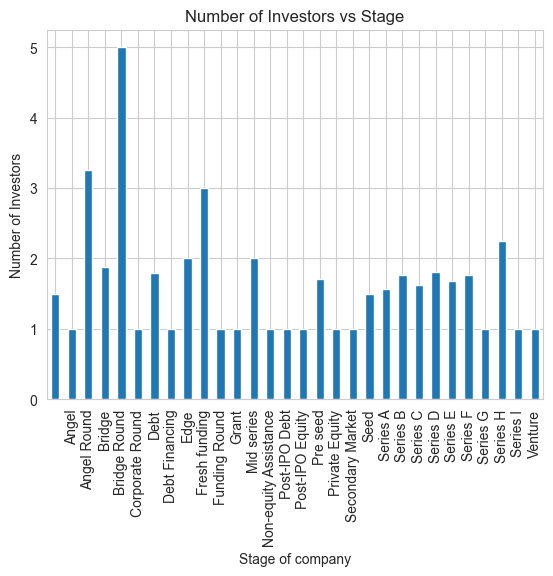

In [241]:
#number of investors vs Stage 
investors_vs_stage=clean_data[['Stage','no_of_investors']].groupby('Stage')['no_of_investors'].mean()


investors_vs_stage.plot(kind='bar', title='Number of Investors vs Stage', ylabel= 'Number of Investors', xlabel='Stage of company')


In [242]:

investors = clean_data['no_of_investors']
funding_amount = clean_data['Amount']

# Correlation coefficient calculation
correlation = investors.corr(funding_amount)

# Print correlation coefficient
print("Correlation coefficient between number of investors and funding amount:", correlation)

Correlation coefficient between number of investors and funding amount: -0.0053457860750859695


Company and Industry Analysis:

4. Industry Trends:
Which sectors (Tech, Health, Finance, etc.) have received the most funding?

How has funding distribution across sectors changed between years (if applicable)?

<Axes: title={'center': 'Top five funding by Sector'}, xlabel='sector', ylabel='funding'>

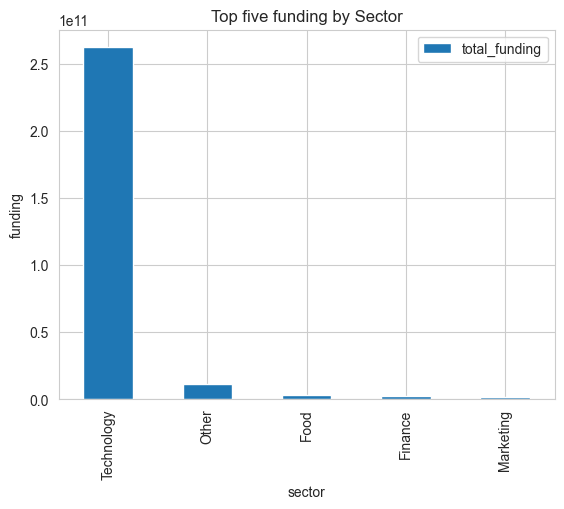

In [244]:
most_funding=clean_data[['Sector','Amount']]

most_funding.groupby('Sector').agg(total_funding=('Amount','sum')).sort_values(by='total_funding', ascending=False).head(5).plot(kind='bar', title='Top five funding by Sector', xlabel='sector', ylabel='funding')

<Axes: title={'center': 'Funding by Sector and Year'}, xlabel='year', ylabel='funding'>

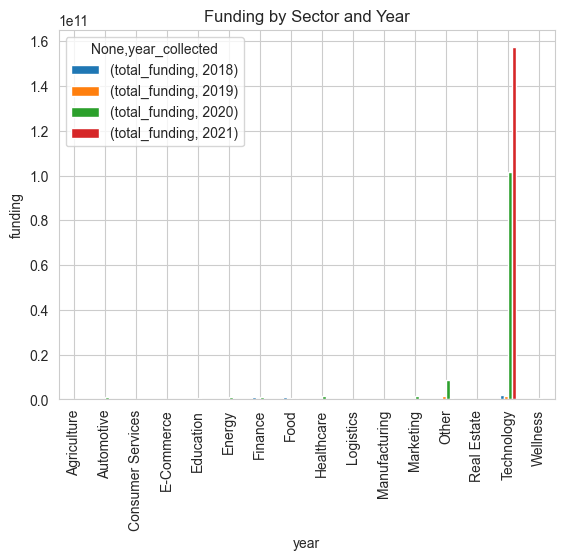

In [245]:
funding_sector_year=clean_data[['Sector', 'year_collected','Amount']]

funding_sector_year.groupby(['Sector','year_collected']).agg(total_funding=('Amount','sum')).unstack().plot(kind='bar', title='Funding by Sector and Year', xlabel='year', ylabel='funding')

5. Startup Locations:
Where are startups headquartered geographically (City/State)?

Are there any specific locations attracting a higher concentration of startups?

HeadQuarter
                  6
Ahmadabad         6
Ahmedabad        29
Alleppey          1
Alwar             1
                 ..
Uttar pradesh     1
Vadodara          1
Warangal          1
West Bengal       1
Worli             1
Name: Company_Brand, Length: 127, dtype: int64

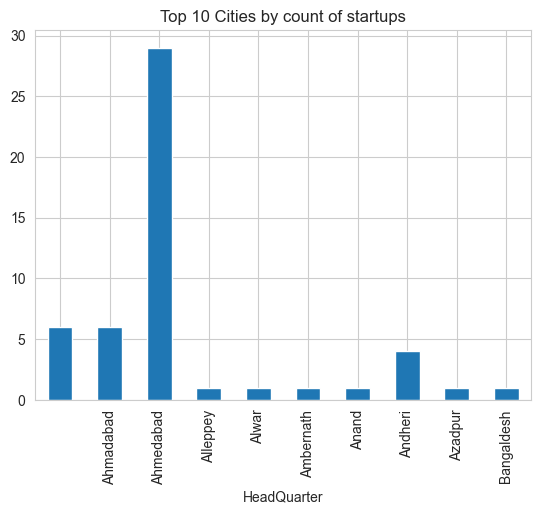

In [249]:
clean_data[['HeadQuarter','Company_Brand']].groupby('HeadQuarter')['Company_Brand'].count().head(10).plot(kind='bar',title='Top 10 Cities by count of startups')

city


6. Company Composition:
What is the average number of founders per startup?

Is there a correlation between the number of founders and the amount of funding received?

In [250]:
founders_no = clean_data['no_of_founders']
funding_amount = clean_data['Amount']

# Correlation coefficient calculation
correlation = founders_no.corr(funding_amount)

# Print correlation coefficient
print("Correlation coefficient between number of founders and funding amount:", correlation)

Correlation coefficient between number of founders and funding amount: -0.019238204734397604


Comparative Analysis:

7. Year-over-Year Growth:
How has the number of startups changed YoY?

Are there any particular sectors showing significant growth?

<Axes: title={'center': 'Startups per year'}, xlabel='year', ylabel='Amount of Funding'>

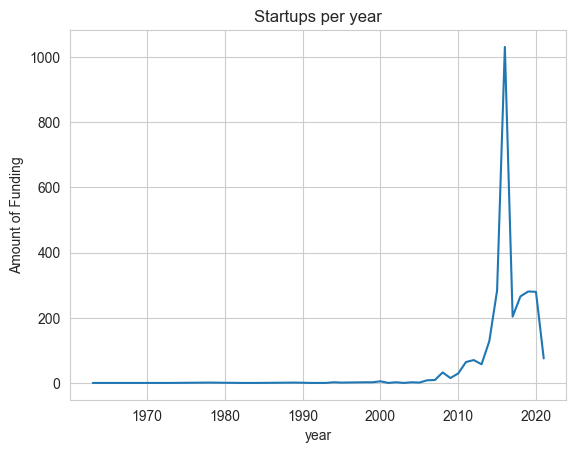

In [253]:
#change in number of startups year after year

clean_data.groupby('Founded')['Company_Brand'].count().plot(kind='line', title='Startups per year', ylabel= 'Amount of Funding', xlabel='year')

<Axes: title={'center': 'Number of startups by year and sector'}, xlabel='year', ylabel='Companies'>

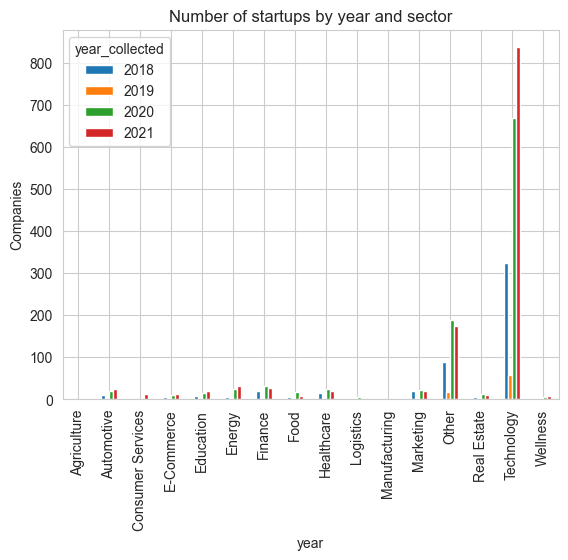

In [259]:
#
clean_data.groupby(['Sector','year_collected'])['Company_Brand'].count().unstack().plot(kind='bar', title='Number of startups by year and sector', xlabel='year', ylabel='Companies')
